In [1]:
#Importando a biblioteca Pandas
import pandas as pd

In [2]:
#Leitura dos arquivos
df1 = pd.read_excel("D:/Area Trabalho ate 17-01-2022/Cursos/Geração Tech UNIMED-BH - Ciencia de Dados/Python/Python_Pandas_Dio-master/datasets/Aracaju.xlsx")
df2 = pd.read_excel("D:/Area Trabalho ate 17-01-2022/Cursos/Geração Tech UNIMED-BH - Ciencia de Dados/Python/Python_Pandas_Dio-master/datasets/Fortaleza.xlsx")
df3 = pd.read_excel("D:/Area Trabalho ate 17-01-2022/Cursos/Geração Tech UNIMED-BH - Ciencia de Dados/Python/Python_Pandas_Dio-master/datasets/Natal.xlsx")
df4 = pd.read_excel("D:/Area Trabalho ate 17-01-2022/Cursos/Geração Tech UNIMED-BH - Ciencia de Dados/Python/Python_Pandas_Dio-master/datasets/Recife.xlsx")
df5 = pd.read_excel("D:/Area Trabalho ate 17-01-2022/Cursos/Geração Tech UNIMED-BH - Ciencia de Dados/Python/Python_Pandas_Dio-master/datasets/Fortaleza.xlsx")

In [3]:
#Juntando todos os arquivos
df = pd.concat([df1, df2, df3, df4, df5])

In [4]:
#Exibindo as 5 primeiras linhas
print (df.head())

    Cidade       Data  Vendas  LojaID  Qtde
0  Aracaju 2018-01-01  142.00    1520     1
1  Aracaju 2018-01-01   14.21    1522     6
2  Aracaju 2018-01-01   71.55    1520     1
3  Aracaju 2018-01-01    3.01    1521     7
4  Aracaju 2018-01-01   24.51    1522     8


In [13]:
#Criando a coluna de receita
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [29]:
#Criando uma nova coluna com o ano
df["Ano_Venda"] = df ["Data"].dt.year

print (df.sample(5))

#Extraindo o mês e o dia
df["mes_venda"], df ["dia_venda"] = (df["Data"].dt.month, df["Data"].dt.day)

print (df.sample(5))

        Cidade       Data  Vendas  LojaID  Qtde  Receita  Ano_Venda
108  Fortaleza 2019-03-02  152.89     981     4   611.56       2019
56   Fortaleza 2019-01-01   18.43    1002     1    18.43       2019
62      Recife 2019-01-01   23.04     983     6   138.24       2019
68      Recife 2019-01-01  175.45     980     3   526.35       2019
24   Fortaleza 2019-01-01   35.38    1005     4   141.52       2019
        Cidade       Data  Vendas  LojaID  Qtde  Receita  Ano_Venda  \
216      Natal 2019-01-02    5.82    1035     1     5.82       2019   
118  Fortaleza 2019-03-02   17.70     981     5    88.50       2019   
98      Recife 2019-01-01  137.34     981     8  1098.72       2019   
62   Fortaleza 2019-01-01  106.21    1005     6   637.26       2019   
30   Fortaleza 2019-01-01   39.13    1005     6   234.78       2019   

     mes_venda  dia_venda  
216          1          2  
118          3          2  
98           1          1  
62           1          1  
30           1          1

In [6]:
#Visualização de Dados

In [7]:
#Value Counts (quantas linhas tem com cada LojaID/do maior para o menor)
print(df["LojaID"].value_counts(ascending=False))

LojaID
983     78
1002    60
1005    60
1004    56
982     54
1036    49
1035    44
980     41
1037    41
1522    41
1003    40
1520    39
981     37
852     29
1523    29
854     28
853     26
1034    23
1521    21
Name: count, dtype: int64


Axes(0.125,0.11;0.775x0.77)


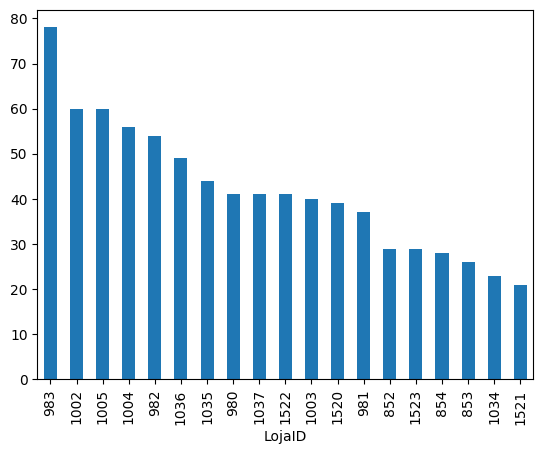

In [8]:
#Criando um gráfico de barras verticais
print(df["LojaID"].value_counts(ascending=False).plot.bar())

Axes(0.125,0.11;0.775x0.77)


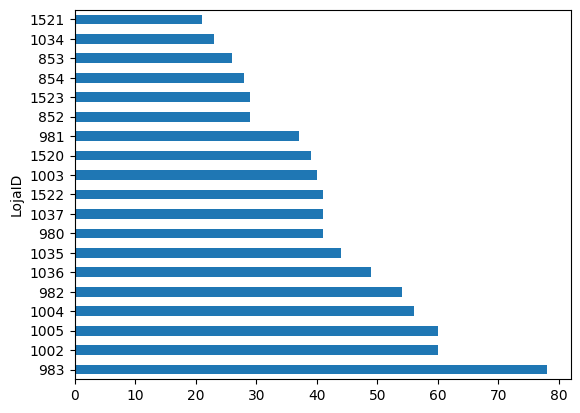

In [10]:
#Criando um gráfico de barras horizontais
print(df["LojaID"].value_counts().plot.barh())

Axes(0.125,0.11;0.775x0.77)


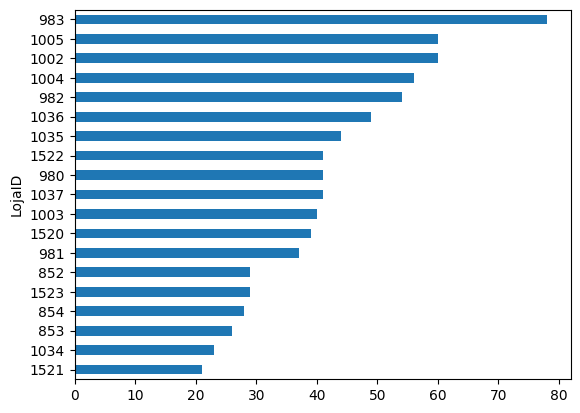

In [19]:
#Criando um gráfico de barras horizontais em ordem maior para o menor
print(df["LojaID"].value_counts(ascending=True).plot.barh())

Axes(0.22375,0.11;0.5775x0.77)


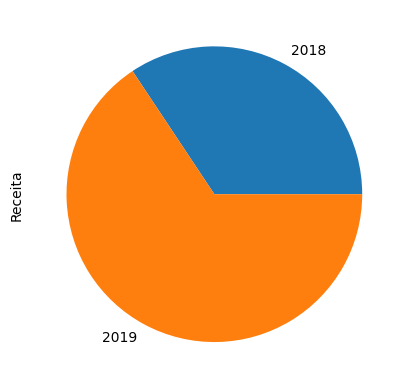

In [16]:
#Criando um gráfico de pizza
print(df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie())

In [15]:
#Total de vendas por cidade
print(df["Cidade"].value_counts())

Cidade
Fortaleza    284
Natal        240
Recife       142
Aracaju      130
Name: count, dtype: int64


Axes(0.125,0.11;0.775x0.77)


Text(0, 0.5, 'Total Vendas')

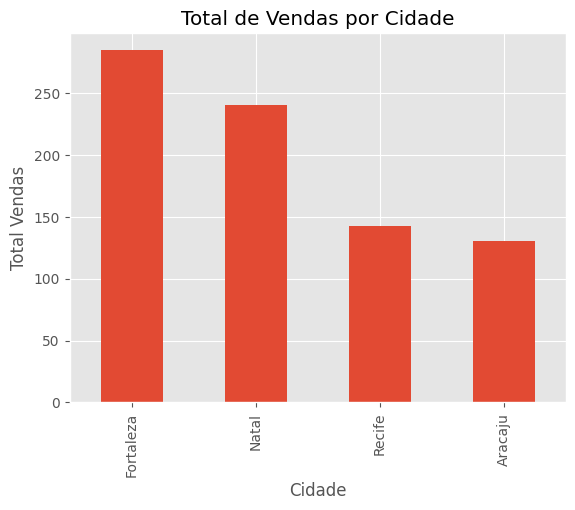

In [25]:
#Adicionando um título e alterando o nome dos eixos
import matplotlib.pyplot as plt
print(df["Cidade"].value_counts().plot.bar(title="Total de Vendas por Cidade"))
plt.xlabel("Cidade")
plt.ylabel("Total Vendas")

Axes(0.125,0.11;0.775x0.77)


Text(0, 0.5, 'Total Vendas')

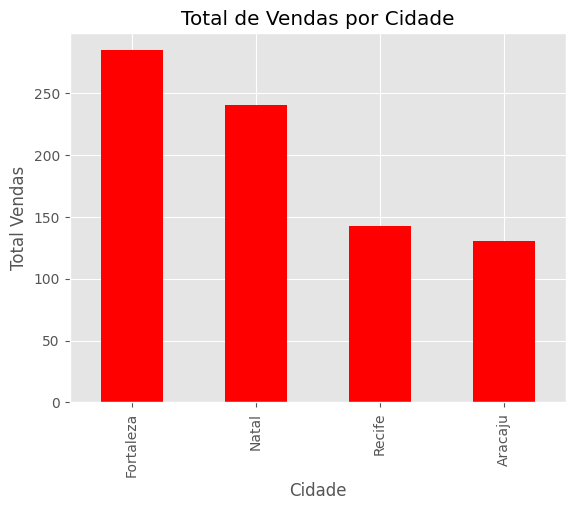

In [26]:
#Alterando a cor do gráfico
print(df["Cidade"].value_counts().plot.bar(title="Total de Vendas por Cidade", color="red"))
plt.xlabel("Cidade")
plt.ylabel("Total Vendas")

In [23]:
#Alterando o estilo do gráfico
plt.style.use("ggplot")

Axes(0.125,0.11;0.775x0.77)


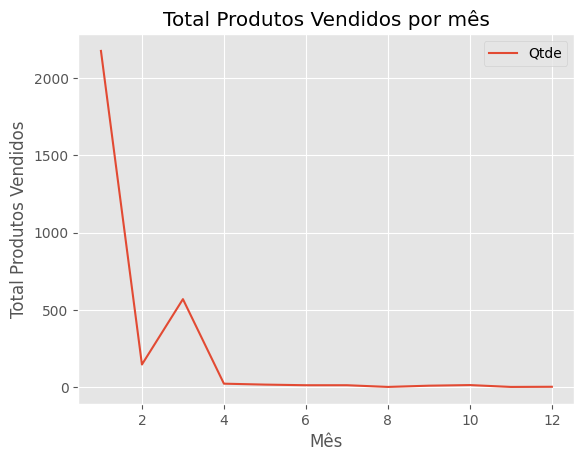

In [31]:
print(df.groupby(df["mes_venda"])["Qtde"].sum().plot(title="Total Produtos Vendidos por mês"))
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos")
plt.legend()

In [33]:
print(df.groupby(df["mes_venda"])["Qtde"].sum())

mes_venda
1     2176
2      147
3      570
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64


In [35]:
#Selecionando apenas as vendas de 2019
df_2019 = df[df["Ano_Venda"]==2019]

Axes(0.125,0.11;0.775x0.77)


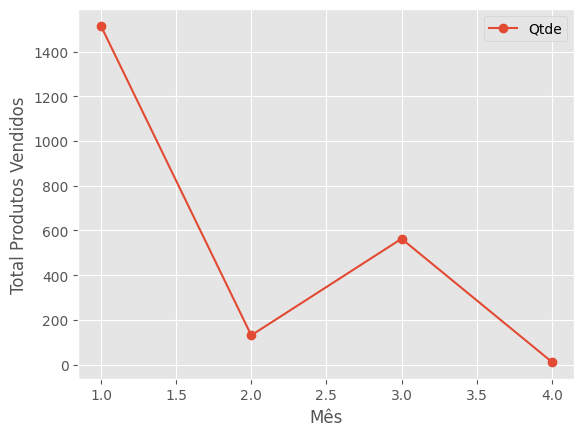

In [37]:
#Total produtos vendidos por mês em 2019
print(df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "o"))
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos")
plt.legend()

(array([124., 136., 166., 114.,  75.,  83.,  43.,  35.,  14.,   6.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

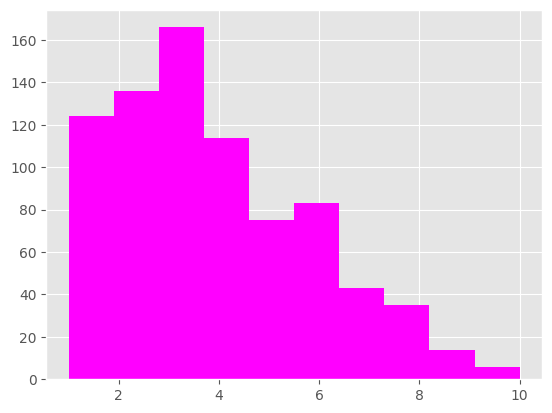

In [39]:
#Histograma
plt.hist(df["Qtde"],color="magenta")

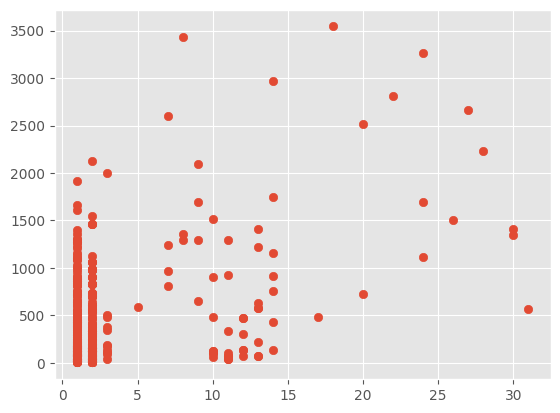

In [41]:
plt.scatter(x=df_2019["dia_venda"], y = df_2019["Receita"])

Axes(0.125,0.11;0.775x0.77)


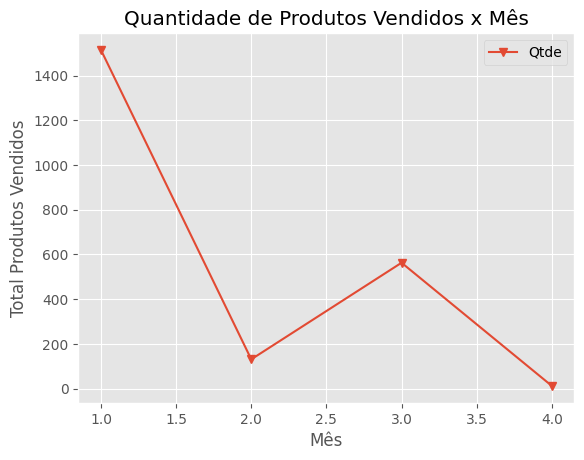

In [42]:
#Salvando em png
print(df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker="v"))
plt.title("Quantidade de Produtos Vendidos x Mês")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos")
plt.legend()
plt.savefig("grafico QTDE x MES.png")